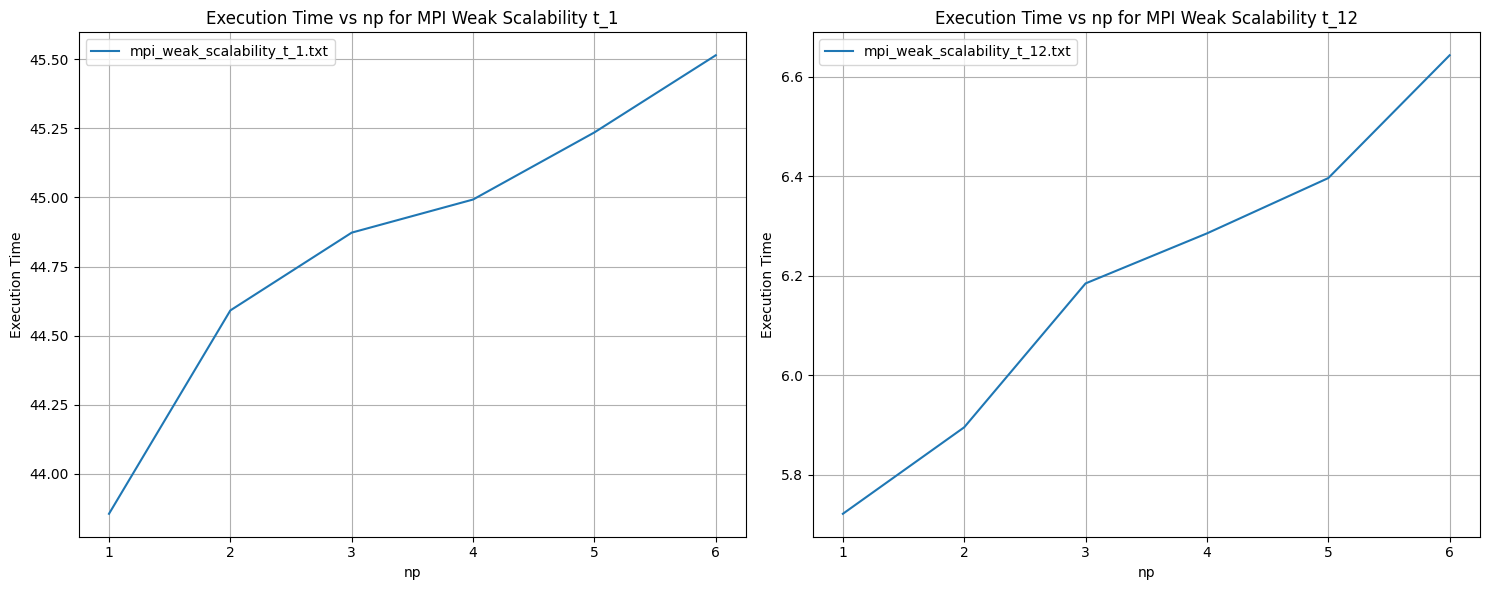

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

# Definire la funzione per leggere i dati dai file e calcolare la media dei tempi
def read_and_process_data(file_path):
    data = pd.read_csv(file_path, sep="\s+", header=0)
    # Rimuovere le righe non valide
    data = data[pd.to_numeric(data["Time"], errors='coerce').notnull()]
    data["Time"] = data["Time"].astype(float)
    data["np"] = data["np"].astype(int)
    # Calcolare la media dei tempi per ogni valore di np
    data = data.groupby("np").mean().reset_index()
    return data

# Lista dei file
file_pattern_1 = "mpi_weak_scalability_t_1.txt"
file_pattern_12 = "mpi_weak_scalability_t_12.txt"
file_list_1 = glob.glob(file_pattern_1)
file_list_12 = glob.glob(file_pattern_12)

# Configurazione del plot
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot per mpi_weak_scalability_t_1.txt
for file in file_list_1:
    data = read_and_process_data(file)
    axs[0].plot(data["np"], data["Time"], label=os.path.basename(file))

axs[0].set_title('Execution Time vs np for MPI Weak Scalability t_1')
axs[0].set_xlabel('np')
axs[0].set_ylabel('Execution Time')
axs[0].grid(True)
axs[0].legend()

# Plot per mpi_weak_scalability_t_12.txt
for file in file_list_12:
    data = read_and_process_data(file)
    axs[1].plot(data["np"], data["Time"], label=os.path.basename(file))

axs[1].set_title('Execution Time vs np for MPI Weak Scalability t_12')
axs[1].set_xlabel('np')
axs[1].set_ylabel('Execution Time')
axs[1].grid(True)
axs[1].legend()

# Adattare il layout
plt.tight_layout()

# Salvare il grafico risultante
plt.savefig("mpi_weak_scalability_plots.png")
plt.show()
